Found 6954 images belonging to 13 classes.
Found 1733 images belonging to 13 classes.
Found 2170 images belonging to 13 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 114s 12us/step


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7274 - loss: 0.9341

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


218/218 ━━━━━━━━━━━━━━━━━━━━ 2311s 11s/step - accuracy: 0.7280 - loss: 0.9320 - val_accuracy: 0.9054 - val_loss: 0.3902
Epoch 2/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 2299s 11s/step - accuracy: 0.9603 - loss: 0.1352 - val_accuracy: 0.9042 - val_loss: 0.3979
Epoch 3/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 2315s 11s/step - accuracy: 0.9722 - loss: 0.0937 - val_accuracy: 0.9302 - val_loss: 0.3142
Epoch 4/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 2224s 10s/step - accuracy: 0.9754 - loss: 0.0814 - val_accuracy: 0.9308 - val_loss: 0.3268
Epoch 5/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 2236s 10s/step - accuracy: 0.9816 - loss: 0.0599 - val_accuracy: 0.9261 - val_loss: 0.3203
Epoch 6/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 2214s 10s/step - accuracy: 0.9807 - loss: 0.0605 - val_accuracy: 0.9296 - val_loss: 0.3373
Epoch 7/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 2367s 11s/step - accuracy: 0.9847 - loss: 0.0479 - val_accuracy: 0.9446 - val_loss: 0.2104
Epoch 8/30
218/218 ━━━━━━━━━━━━━━━━━━━━ 2311s 11s/step - accuracy: 0.9827 - loss: 0.0521 - val

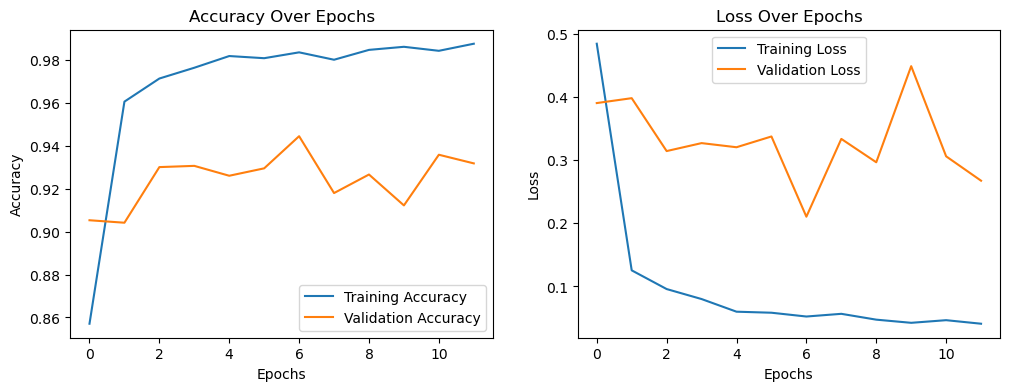

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Dataset paths
dataset_dir = "D:/Academic/4th year/Research/NewDataset"  # Update with the correct path
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

# Image data generators for augmentation and preprocessing
img_height, img_width = 224, 224  # MobileNetV2 requires input size of at least 224x224
batch_size = 32

# Using validation_split to split training data into training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # 20% for validation

# Training data generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                     target_size=(img_height, img_width),
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     subset='training')  # Specify training subset

# Validation data generator
val_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_height, img_width),
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   subset='validation')  # Specify validation subset

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size=(img_height, img_width),
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)

# Load the pre-trained MobileNetV2 model without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers to use them as a feature extractor
base_model.trainable = False

# Add custom classification layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduces the spatial dimensions of the feature maps
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(13, activation='softmax')  # Adjust the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=30,
                    callbacks=[early_stopping]
                   )

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()


In [13]:
model_save_path = "leaf_identifyer.h5"
model.save(model_save_path)
print(f"Model saved at {model_save_path}")

Model saved at leaf_identifyer.h5


In [15]:
from tensorflow.keras.models import load_model
def load_and_test_model(image_path):
    loaded_model = load_model(model_save_path)
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = loaded_model.predict(img_array)
    class_indices = {v: k for k, v in train_generator.class_indices.items()}
    predicted_class = class_indices[np.argmax(prediction)]
    print(f"Predicted leaf type: {predicted_class}")

In [25]:
image_path = 'D:/Academic/4th year/Research/test/tea.jpeg'
load_and_test_model(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted leaf type: Tea


In [101]:
# predict and makes it as separate folder
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageDraw, ImageFont

# Constants
model_save_path = "leaf_identifyer.h5"
img_height, img_width = 224, 224  # Ensure these match your model's input size
output_folder = "D:/Academic/4th year/Research/MobileNetV2_Result"  # Folder to save annotated images

# Load the trained model
def load_and_save_predictions(folder_path):
    # Load the saved model
    loaded_model = load_model(model_save_path)
    
    # Reverse the class indices to map predictions to class names
    class_indices = {v: k for k, v in train_generator.class_indices.items()}
    
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Iterate over all files in the folder
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        
        if not img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            # Skip files that are not images
            print(f"Skipping non-image file: {img_file}")
            continue
        
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        # Predict the class
        prediction = loaded_model.predict(img_array)
        predicted_class = class_indices[np.argmax(prediction)]
        
        # Annotate and save the image
        save_annotated_image(img_path, img_file, predicted_class)

# Function to annotate and save the image
def save_annotated_image(img_path, img_file, predicted_class):
    # Open the original image
    original_img = Image.open(img_path)
    
    # Create a drawing context
    draw = ImageDraw.Draw(original_img)
    
    # Define font (use default if custom font isn't available)
    try:
        font = ImageFont.truetype("arial.ttf", size=20)
    except IOError:
        font = ImageFont.load_default()
    
    # Add the prediction text
    text = f"Prediction: {predicted_class}"
    text_position = (10, 10)  # Top-left corner
    text_color = (255, 0, 0)  # Red color
    
    draw.text(text_position, text, fill=text_color, font=font)
    
    # Save the annotated image in the output folder
    output_path = os.path.join(output_folder, img_file)
    original_img.save(output_path)
    print(f"Saved annotated image: {output_path}")

# Folder path containing test images
folder_path = 'D:/Academic/4th year/Research/MobileNetV2_test'
load_and_save_predictions(folder_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Saved annotated image: D:/Academic/4th year/Research/MobileNetV2_Result\0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Saved annotated image: D:/Academic/4th year/Research/MobileNetV2_Result\1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Saved annotated image: D:/Academic/4th year/Research/MobileNetV2_Result\10.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Saved annotated image: D:/Academic/4th year/Research/MobileNetV2_Result\11.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Saved annotated image: D:/Academic/4th year/Research/MobileNetV2_Result\2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Saved annotated image: D:/Academic/4th year/Research/MobileNetV2_Result\20211231_161427 (Custom).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Saved annotated image: D:/Academic/4th year/Research/MobileNetV2_Result\20211231_161436 (Custom).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Saved annotated image: D:/Academic/4th year/Research/MobileNetV2_Result\20211231_161439 (Custom).jpg
1/1

In [ ]:
# predict in the console

In [99]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Constants
model_save_path = "leaf_identifyer.h5"
img_height, img_width = 224, 224  # Ensure these match your model's input size

# Load the trained model
def load_and_test_model(folder_path):
    # Load the saved model
    loaded_model = load_model(model_save_path)
    
    # Reverse the class indices to map predictions to class names
    class_indices = {v: k for k, v in train_generator.class_indices.items()}
    
    # Iterate over all files in the folder
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        
        if not img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            # Skip files that are not images
            print(f"Skipping non-image file: {img_file}")
            continue
        
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        # Predict the class
        prediction = loaded_model.predict(img_array)
        predicted_class = class_indices[np.argmax(prediction)]
        
        # Print the result
        print(f"Image: {img_file} | Predicted leaf type: {predicted_class}")

# Folder path containing test images
folder_path = 'D:/Academic/4th year/Research/MobileNetV2_test'
load_and_test_model(folder_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image: 0.jpg | Predicted leaf type: Coffee
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Image: 1.jpg | Predicted leaf type: Coffee
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Image: 10.jpg | Predicted leaf type: Coffee
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image: 11.jpg | Predicted leaf type: Coffee
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image: 2.jpg | Predicted leaf type: Coffee
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Image: 20211231_161427 (Custom).jpg | Predicted leaf type: Tea
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Image: 20211231_161436 (Custom).jpg | Predicted leaf type: Tea
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Image: 20211231_161439 (Custom).jpg | Predicted leaf type: Tea
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image: 20211231_161448 (Custom).jpg | Predicted leaf type: Tea
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Image: 20211231_161454 (Custom).jpg | Predicted leaf type: Tea
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Image: 20211231_161457 (Custom).jpg | Predicted leaf

In [ ]:
# plant image and it's name

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


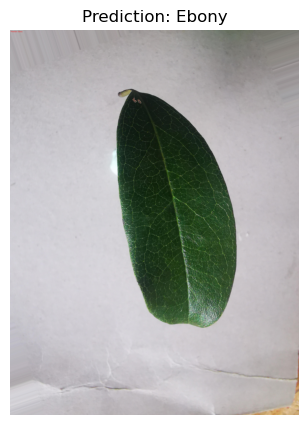

In [91]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Constants
model_save_path = "leaf_identifyer.h5"
img_height, img_width = 224, 224  # Ensure these match your model's input size

# Load the trained model
loaded_model = load_model(model_save_path)

# Reverse the class indices to map predictions to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Function to load, predict, and display the image
def load_and_display_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = loaded_model.predict(img_array)
    predicted_class = class_indices[np.argmax(prediction)]

    # Annotate the original image
    original_img = Image.open(image_path)
    draw = ImageDraw.Draw(original_img)
    try:
        font = ImageFont.truetype("arial.ttf", size=20)
    except IOError:
        font = ImageFont.load_default()
    draw.text((10, 10), f"Prediction: {predicted_class}", fill=(255, 0, 0), font=font)

    # Display the image in the notebook
    plt.figure(figsize=(5, 5))
    plt.imshow(original_img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_class}")
    plt.show()

# Path to the image
image_path = 'D:/Academic/4th year/Research/test/augmented_image_IMG_20240730_093122_1.jpg'
load_and_display_image(image_path)
